# Deep Learning Indonesia.AI
Pertemuan - 4 Feedforward Propogation

The training process starts with a forward pass, where the input data is fed to the neural network (see Fig.1). Then the model applies its internal math on the input and internal variables to predict an answer ("Model Predicts a Value" in Fig. 1).

![](https://video.udacity-data.com/topher/2019/March/5c7f0b37_tensorflow-l2f2/tensorflow-l2f2.png)

you should know what the following terms are :
* **Feature** : The input(s) to our model
* **Examples** : An input/output pair used for training
* **Labels** : The output of the model
* **Layer** : A collection of nodes connected together within a neural network.
* **Model** : The representation of your neural network
* **Dense and Fully Connected (FC)** : Each node in one layer is connected to each node in the previous layer.
* **Weights and biases** : The internal variables of model
* **Loss**: The discrepancy between the desired output and the actual output
* **MSE** : Mean squared error, a type of loss function that counts a small number of large discrepancies as worse than a large number of small ones.
* **Gradient Descent** : An algorithm that changes the internal variables a bit at a time to gradually reduce the loss function.
* **Optimizer** : A specific implementation of the gradient descent algorithm. (There are many algorithms for this. In this course we will only use the “Adam” * Optimizer, which stands for ADAptive with Momentum. It is considered the best-practice optimizer.)
* **Learning rate** : The “step size” for loss improvement during gradient descent.
* **Batch** : The set of examples used during training of the neural network
* **Epoch** : A full pass over the entire training dataset
* **Forward pass** : The computation of output values from input
* **Backward pass (backpropagation)** : The calculation of internal variable adjustments according to the optimizer algorithm, starting from the output layer and working back through each layer to the input.

# Import Libraries

In [63]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

plt.style.use('ggplot')

# Generate Data

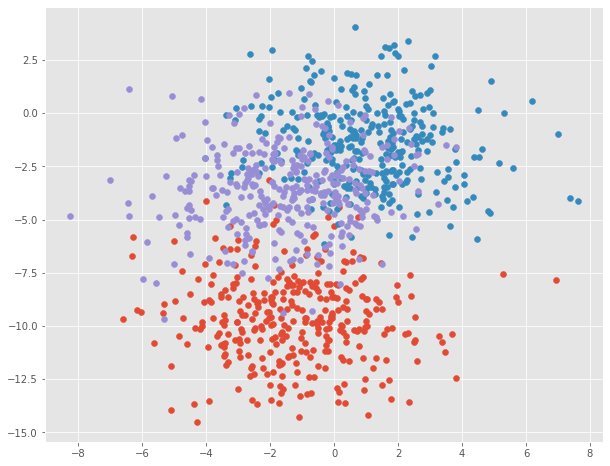

In [64]:
# generate 2d classification datasets
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
plt.figure(figsize=(10,8))
# scatter plot for each class value
for class_value in range(3):
    
    # select indices of points with the class label
    row_ix = np.where(y == class_value)
    # scatter plot for points with a different color
    plt.scatter(X[row_ix, 0], X[row_ix, 1])

    
# show plot
plt.show()

# Preparation data

In [65]:
# one hot encode output variable
y = to_categorical(y)

# split into train and test
n_train = 500

trainX, validX = X[:n_train, :], X[n_train:, :]
trainy, validy = y[:n_train], y[n_train:]

# Train model

## Hyperparameter *Batch Size*
The number of examples (Data) from training datasets used in the estimate of the error is called **Batch size**

this error is then used to update the model *weights* and the process is repeated

In general, the impact of change in batch size of learning algorithm is as the following :
1. The speed of training
2. The speed of learning
3. Stability during learning
4. Final performance

### Batch Gradient Descent (batch_size=train_size)

In [66]:
model = Sequential(name='layers_batch_gradient_descent')
model.add(Dense(units=50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(units=3, activation='softmax'))  # last layer must have same neuron with output data

In [67]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)

model.compile(loss='categorical_crossentropy',
                optimizer=optimizer, 
                metrics=['accuracy'])

In [68]:
epoch = 200

history = model.fit(trainX, trainy,
                    validation_data=(validX, validy),
                    epochs=epoch, batch_size=len(trainX))

Epoch 1/200
1/1 [==============================] - 1s 596ms/step - loss: 2.6505 - accuracy: 0.2900 - val_loss: 1.7058 - val_accuracy: 0.5280
Epoch 2/200
1/1 [==============================] - 0s 40ms/step - loss: 1.7186 - accuracy: 0.4960 - val_loss: 1.5256 - val_accuracy: 0.5700
Epoch 3/200
1/1 [==============================] - 0s 48ms/step - loss: 1.4837 - accuracy: 0.5120 - val_loss: 2.2170 - val_accuracy: 0.4240
Epoch 4/200
1/1 [==============================] - 0s 40ms/step - loss: 2.2792 - accuracy: 0.4020 - val_loss: 1.5540 - val_accuracy: 0.5660
Epoch 5/200
1/1 [==============================] - 0s 40ms/step - loss: 1.5618 - accuracy: 0.5320 - val_loss: 1.6506 - val_accuracy: 0.5460
Epoch 6/200
1/1 [==============================] - 0s 40ms/step - loss: 1.7294 - accuracy: 0.5060 - val_loss: 1.2176 - val_accuracy: 0.6040
Epoch 7/200
1/1 [==============================] - 0s 48ms/step - loss: 1.2194 - accuracy: 0.5580 - val_loss: 2.2120 - val_accuracy: 0.4960
Epoch 8/200
1/1 [==

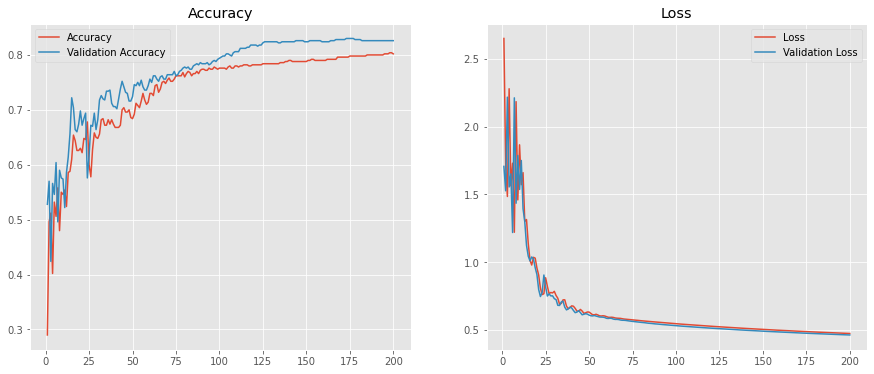

In [69]:
epoch_range = np.arange(1,epoch+1)

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, history.history['accuracy'], label='Accuracy')
plt.plot(epoch_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epoch_range, history.history['loss'], label='Loss')
plt.plot(epoch_range, history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [70]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.802, Valid: 0.826


### Stochastic Gradient Descent (batch_size=1)

In [71]:
model = Sequential(name='layers_stochastic_gradient_descent')
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

In [72]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)

model.compile(loss='categorical_crossentropy',
                optimizer=optimizer, 
                metrics=['accuracy'])

In [73]:
epoch = 200

history = model.fit(trainX, trainy,
                    validation_data=(validX, validy),
                    epochs=epoch, batch_size=1)

Epoch 1/200
500/500 [==============================] - 2s 3ms/step - loss: 1.4991 - accuracy: 0.6040 - val_loss: 0.6390 - val_accuracy: 0.7480
Epoch 2/200
500/500 [==============================] - 2s 4ms/step - loss: 0.9606 - accuracy: 0.5860 - val_loss: 1.0237 - val_accuracy: 0.5360
Epoch 3/200
500/500 [==============================] - 2s 3ms/step - loss: 0.9680 - accuracy: 0.5160 - val_loss: 0.8419 - val_accuracy: 0.5620
Epoch 4/200
500/500 [==============================] - 1s 3ms/step - loss: 0.8290 - accuracy: 0.6240 - val_loss: 0.5228 - val_accuracy: 0.7680
Epoch 5/200
500/500 [==============================] - 2s 4ms/step - loss: 0.8514 - accuracy: 0.6080 - val_loss: 0.6699 - val_accuracy: 0.7620
Epoch 6/200
500/500 [==============================] - 1s 3ms/step - loss: 0.7138 - accuracy: 0.6640 - val_loss: 0.6376 - val_accuracy: 0.6980
Epoch 7/200
500/500 [==============================] - 2s 3ms/step - loss: 0.9293 - accuracy: 0.5480 - val_loss: 0.9377 - val_accuracy: 0.4660

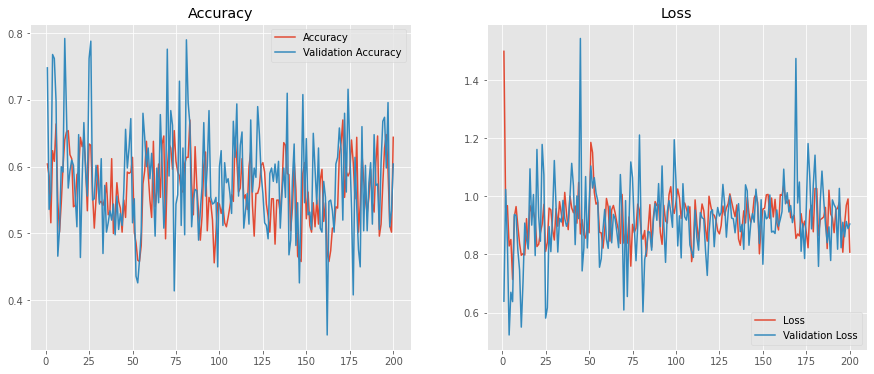

In [74]:
epoch_range = np.arange(1,epoch+1)

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, history.history['accuracy'], label='Accuracy')
plt.plot(epoch_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epoch_range, history.history['loss'], label='Loss')
plt.plot(epoch_range, history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [75]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.608, Valid: 0.604


### Stochastic Gradient Descent (batch_size=1, lr=0.001)

In [76]:
model = Sequential(name='layers_stochastic_gradient_descent')
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

In [77]:
optimizer = SGD(learning_rate=0.001, momentum=0.9)

model.compile(loss='categorical_crossentropy',
                optimizer=optimizer, 
                metrics=['accuracy'])

In [78]:
epoch = 200

history = model.fit(trainX, trainy,
                    validation_data=(validX, validy),
                    epochs=epoch, batch_size=1)

Epoch 1/200
500/500 [==============================] - 2s 4ms/step - loss: 1.6789 - accuracy: 0.5680 - val_loss: 2.2551 - val_accuracy: 0.6080
Epoch 2/200
500/500 [==============================] - 2s 3ms/step - loss: 0.9718 - accuracy: 0.6640 - val_loss: 0.5965 - val_accuracy: 0.7920
Epoch 3/200
500/500 [==============================] - 2s 4ms/step - loss: 0.6626 - accuracy: 0.7060 - val_loss: 0.5427 - val_accuracy: 0.7240
Epoch 4/200
500/500 [==============================] - 2s 3ms/step - loss: 0.5722 - accuracy: 0.7680 - val_loss: 0.4863 - val_accuracy: 0.8120
Epoch 5/200
500/500 [==============================] - 2s 4ms/step - loss: 0.5352 - accuracy: 0.7580 - val_loss: 0.5084 - val_accuracy: 0.7840
Epoch 6/200
500/500 [==============================] - 2s 4ms/step - loss: 0.4699 - accuracy: 0.8220 - val_loss: 0.4756 - val_accuracy: 0.8020
Epoch 7/200
500/500 [==============================] - 2s 4ms/step - loss: 0.5153 - accuracy: 0.7760 - val_loss: 0.4683 - val_accuracy: 0.8280

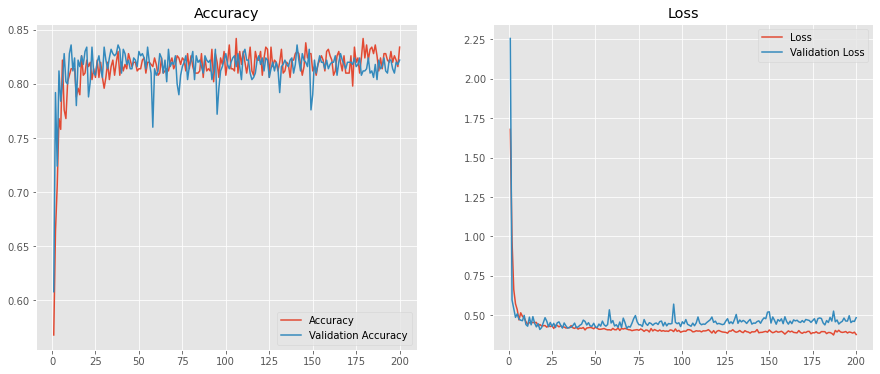

In [79]:
epoch_range = np.arange(1,epoch+1)

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, history.history['accuracy'], label='Accuracy')
plt.plot(epoch_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epoch_range, history.history['loss'], label='Loss')
plt.plot(epoch_range, history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [80]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.818, Valid: 0.822


### Mini Batch Size on Model Behavior (batch_size=32, lr=0.01)

In [81]:
model = Sequential(name='layers_stochastic_gradient_descent')
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

In [82]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)

model.compile(loss='categorical_crossentropy',
                optimizer=optimizer, 
                metrics=['accuracy'])

In [83]:
epoch = 200

history = model.fit(trainX, trainy,
                    validation_data=(validX, validy),
                    epochs=epoch, batch_size=32)

Epoch 1/200
16/16 [==============================] - 1s 18ms/step - loss: 2.5020 - accuracy: 0.5320 - val_loss: 2.3544 - val_accuracy: 0.6080
Epoch 2/200
16/16 [==============================] - 0s 7ms/step - loss: 2.0441 - accuracy: 0.5460 - val_loss: 1.6171 - val_accuracy: 0.6440
Epoch 3/200
16/16 [==============================] - 0s 6ms/step - loss: 2.1062 - accuracy: 0.5220 - val_loss: 1.0700 - val_accuracy: 0.6740
Epoch 4/200
16/16 [==============================] - 0s 6ms/step - loss: 1.3259 - accuracy: 0.6060 - val_loss: 1.3237 - val_accuracy: 0.6300
Epoch 5/200
16/16 [==============================] - 0s 6ms/step - loss: 0.8747 - accuracy: 0.6640 - val_loss: 0.5937 - val_accuracy: 0.7600
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 0.6188 - accuracy: 0.7320 - val_loss: 0.5425 - val_accuracy: 0.7580
Epoch 7/200
16/16 [==============================] - 0s 5ms/step - loss: 0.5660 - accuracy: 0.7620 - val_loss: 0.5260 - val_accuracy: 0.7800
Epoch 8/200


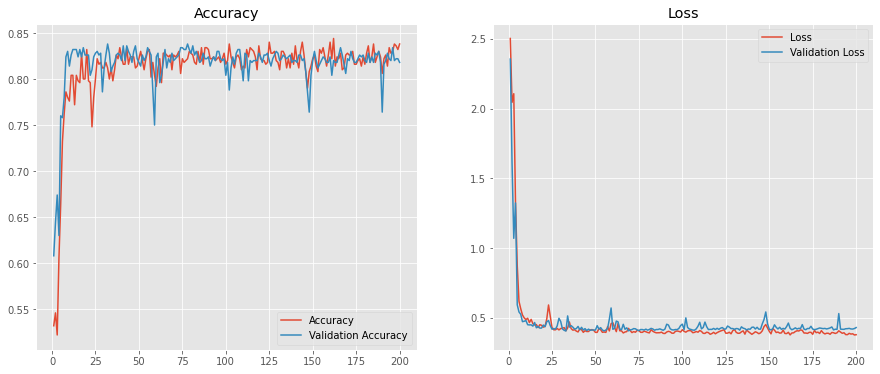

In [84]:
epoch_range = np.arange(1,epoch+1)

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, history.history['accuracy'], label='Accuracy')
plt.plot(epoch_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epoch_range, history.history['loss'], label='Loss')
plt.plot(epoch_range, history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [85]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.834, Valid: 0.818


### Effect of Batch Size on Model Behavior

In [86]:
# prepare train and test dataset
def prepare_data():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

    # one hot encode output variable
    y = to_categorical(y)
    
    # split into train and valid
    n_train = 500
    trainX, validX = X[:n_train, :], X[n_train:, :]
    trainy, validy = y[:n_train], y[n_train:]
    return trainX, trainy, validX, validy

In [87]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, validX, validy, n_batch):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))

    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=200, verbose=0, batch_size=n_batch)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('batch='+str(n_batch))
    plt.legend()

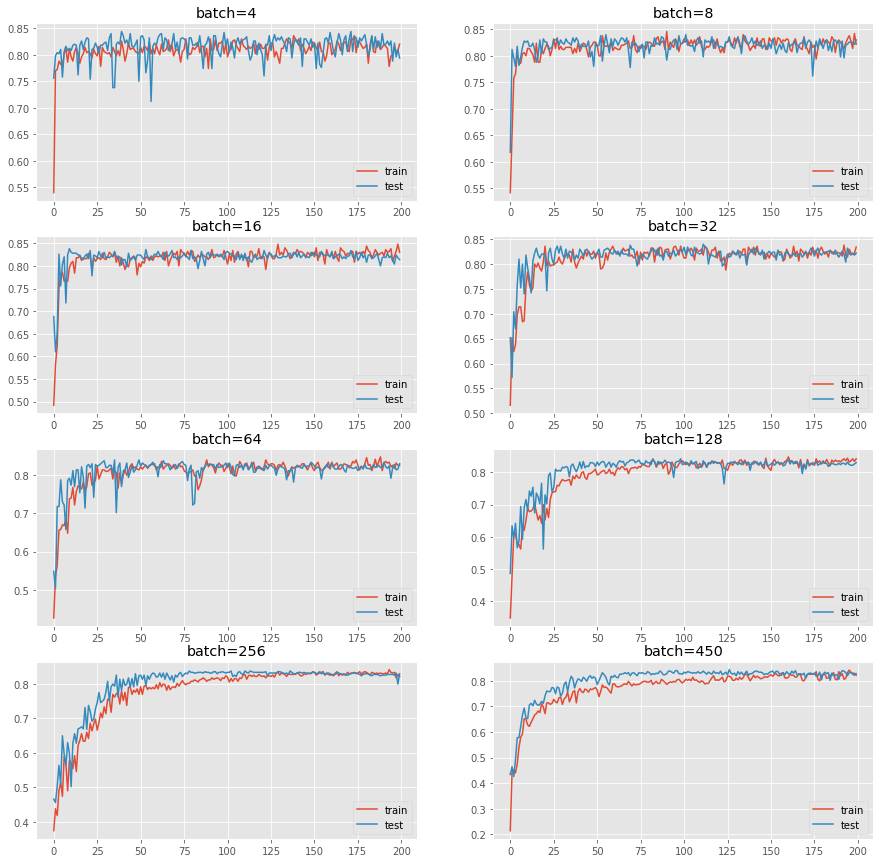

In [88]:
# prepare dataset
trainX, trainy, validX, validy = prepare_data()

# create learning curves for different batch sizes
batch_sizes = [4, 8, 16, 32, 64, 128, 256, 450]

plt.figure(figsize=(15, 15))
for i in range(len(batch_sizes)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a batch size
    fit_model(trainX, trainy, validX, validy, batch_sizes[i])

# show learning curves
plt.show()

## Hyperparameters *Activation Function*

Activation functions are mathematical equations that determine the
output of a neural network. The function is attached to each neuron in the
network, and determines whether it should be activated (“fired”) or not.
Activation functions also help normalize the output of each neuron to a 
range between 1 and 0 or between -1 and 1

![](https://static.wixstatic.com/media/8f929f_c90ad7e1f4c54b27b309e58ee2b9c654~mv2.png/v1/fit/w_880%2Ch_685%2Cal_c/file.png)

## Formulas



### Binary Step Function

```python
if x <0:
    return 0
else:
    return 1
```

### Linear Function

```python
2*x
```

### Sigmoid Function

```python
z = (1/(1+ np.exp(-x)))
```

### TanH Function

```python
z = (2/(1+ np.exp(-2*x))) - 1
```

### ReLU Function

```python
if x <0:
    return 0
else:
    return 1
```

### Leaky ReLu Function

```python
if x <0:
    return 0.01*x
else:
    return x
```

### Softmax Function

```python
z = np.exp(x)
logits = z/z.sum()
```

### eLU Function

```python
if x<0:
    return a*(np.exp(x)-1)
else:
    return x
```

### Swish Function

```python
x/(1-np.exp(-x))
```